# Python for bioimage analysis

<div class="custom-button-row">
    <a 
        class="custom-button custom-download-button" href="../../notebooks/04_digital_images_intro/python_for_bioimage_analysis.ipynb" download>
        <i class="fas fa-download"></i> Download this Notebook
    </a>
    <a
    class="custom-button custom-download-button" href="https://colab.research.google.com/github/HMS-IAC/bobiac/blob/gh-pages/colab_notebooks/04_digital_images_intro/python_for_bioimage_analysis.ipynb" target="_blank">
        <img class="button-icon" src="../../_static/logo/icon-google-colab.svg" alt="Open in Colab">
        Open in Colab
    </a>
</div>


In [571]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "bioio",
#     "bioio-nd2",
#     "imageio",
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "numpy",
#     "rich",
#     "tifffile",
# ]
# ///

## Description
This notebook centers around ```numpy``` array - the most common representation of images in python. 

## Objectives
We learn how to read in images, manipulate them and visualize them as ```numpy``` arrays, and about common pitfalls. 

## Table of Contents
1. Importing libraries
2. Reading images using ```tifffile```
3. View images using ```ndv```
4. ```numpy```: indexing 
5. ```numpy```: multiple channels and z-stacks
6. ```numpy```: generating ```numpy``` arrays
7. Visualize images using ```matplotlib``` (functions) 
8. Reading images using ```bioio```

## 1. Import all necessary libraries

In [572]:
import matplotlib.pyplot as plt
import ndv
import numpy as np
import tifffile
from bioio import BioImage
from rich import print

## 2. Read an image using tifffile

In [573]:
img_path = "../../_static/images/python4bia/confocal-series.tif"

stack = tifffile.imread(img_path)
print(stack.dtype)
print(stack.shape)

uint8

(25, 2, 400, 400)

## 3. View images using `ndv`
```ndv``` documentation: https://pyapp-kit.github.io/ndv/latest/  
Reminder: we imported ```ndv``` using 
```python
import ndv
```

In [574]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

In [575]:
viewer = ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>


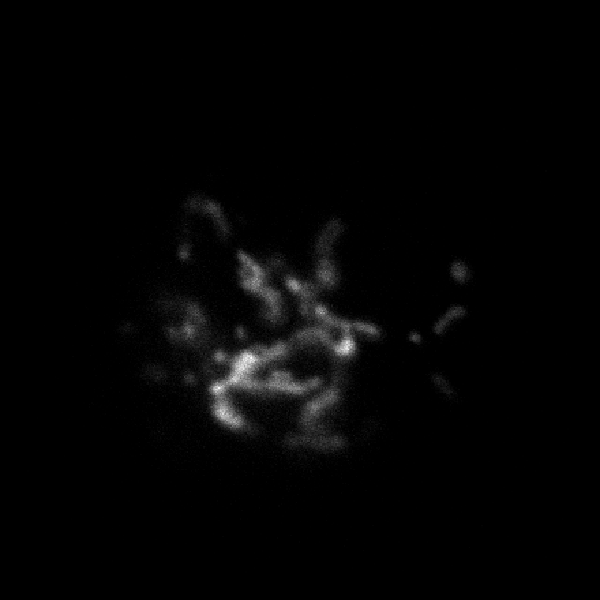

In [576]:
viewer.widget().children[1].snapshot()

***

## 4. ```numpy``` arrays - intro, indexing and slicing

**NumPy** stands for *Numerical Python*. It lets us perform mathematical operations on **NumPy** arrays.  
A **NumPy** array holds numeric data—such as images!  
In short, **NumPy** lets us compute on and manipulate images quickly.  
For this reason, many imaging libraries store images as **NumPy** arrays.  

### 4.1 Load an image

We load image ```cateye_nonsquare_ds.tif```. We can apply the same approach as before 

In [577]:
cat_img_path = "../../_static/images/python4bia/cateye_nonsquare_ds.tif"
cat = tifffile.imread(cat_img_path)

### 4.2 Inspecting ```numpy``` arrays

#### Inspecting raw intensity values

Remember, the image is now a ```numpy``` array.  
The simplest way of viewing its values is by running the following cell:   

In [578]:
cat

array([[217, 176, 226, 253, 150, 226, 228, 220, 210, 218, 224],
       [215, 181, 236, 219, 225, 220, 215, 210, 141, 173, 105],
       [199, 140, 231, 222, 228, 238, 218, 194, 195, 197,  34],
       [206, 202, 236, 240, 213, 218, 192, 249, 244, 240,  52],
       [226, 220, 235, 202, 188,  50, 226, 242, 233, 224,  49],
       [238, 247, 208, 179, 234,  91, 181, 227, 237, 140,  45],
       [230, 164, 234, 176, 182, 233, 237, 209, 176,  51, 192],
       [246,  86, 204, 218, 199, 202, 230, 208,  51,  61, 222],
       [251,  34, 150, 201, 198, 223, 157,  57,  56, 239, 101],
       [249, 131, 111,  62,  48,  53,  67, 110, 223, 129, 140],
       [253, 148, 169, 184, 150, 182, 197, 236, 206, 142, 197],
       [253, 175, 202, 222, 253, 251, 234, 185, 165, 144, 164]],
      dtype=uint8)

We can also use the print function. 

In [579]:
print(cat)

[[217 176 226 253 150 226 228 220 210 218 224]
 [215 181 236 219 225 220 215 210 141 173 105]
 [199 140 231 222 228 238 218 194 195 197  34]
 [206 202 236 240 213 218 192 249 244 240  52]
 [226 220 235 202 188  50 226 242 233 224  49]
 [238 247 208 179 234  91 181 227 237 140  45]
 [230 164 234 176 182 233 237 209 176  51 192]
 [246  86 204 218 199 202 230 208  51  61 222]
 [251  34 150 201 198 223 157  57  56 239 101]
 [249 131 111  62  48  53  67 110 223 129 140]
 [253 148 169 184 150 182 197 236 206 142 197]
 [253 175 202 222 253 251 234 185 165 144 164]]

### 4.3 Inspecting properties of the image

Let's print a few properties of ```cat```

In [580]:
print(f"Type of the image: {type(cat)}")
print(f"Datatype of the image: {cat.dtype}")
print(f"Shape of the image: {cat.shape}")  # Dimensions of the image
print(f"Minimum pixel value: {cat.min()}")  # Min pixel value
print(f"Maximum pixel value: {cat.max()}")  # Max pixel value
print(f"Mean pixel value: {cat.mean():.2f}")  # Average pixel value

Type of the image: <class 'numpy.ndarray'>

Datatype of the image: uint8

Shape of the image: (12, 11)

Minimum pixel value: 34

Maximum pixel value: 253

Mean pixel value: 184.17

### 4.4 Generate a simple plot of the image
Reminder: we imported ```plt``` using  

```python
import matplotlib.pyplot as plt
```

#### Plot using ```plt.imshow()``` 

### Code along: 

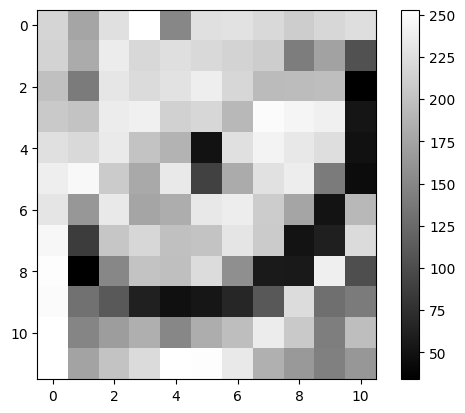

In [581]:
plt.imshow(cat, cmap="gray")
plt.colorbar()
plt.show()

### ✍️ Exercise: Write a plotting function
Write the previous plotting code as a function

In [582]:
def simpleplot(image: np.ndarray) -> None:
    """
    Plot `image` in grayscale with an accompanying colorbar.

    Parameters
    ----------
    image : A 2D np.ndarray
    """
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()

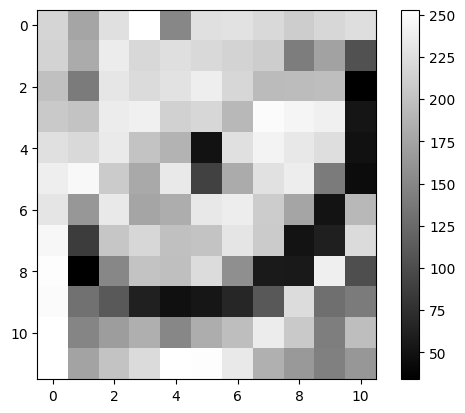

In [583]:
simpleplot(cat)

### 4.5 Plot a simple histogram

In [584]:
def valueplot(image: np.ndarray, indices: str = None) -> None:
    """
    Show a 2-D array as a grayscale heat-map, print each pixel's value on top,
    and optionally outline pixels or regions.

    Parameters
    ----------
    image : np.ndarray
        Array of shape (rows, cols).
    indices : str, optional
        String with numpy indexing notation using either brackets [] or parentheses ().

        Examples:
        - "(5, 3)" or "[5, 3]" - single pixel
        - "[0:5, 3:7]" or "(0:5, 3:7)" - region from rows 0-4, columns 3-6
        - "(:, 0)" or "[:, 0]" - entire column 0
        - "(2, :)" or "[2, :]" - entire row 2
        - "[:,:]" - entire image
        - "[::2, 1::3]" - every 2nd row, every 3rd column starting from column 1
    """

    def parse_index_string(index_str: str) -> tuple:
        """Parse numpy-style indexing string into tuple of slices/ints."""
        # Remove brackets and parentheses
        index_str = index_str.strip()
        if index_str.startswith("[") and index_str.endswith("]"):
            index_str = index_str[1:-1]
        elif index_str.startswith("(") and index_str.endswith(")"):
            index_str = index_str[1:-1]

        # Split by comma
        parts = [part.strip() for part in index_str.split(",")]

        if len(parts) != 2:
            raise ValueError(
                "Index string must have exactly 2 parts separated by comma"
            )

        result = []
        for part in parts:
            if part == ":" or part == "":
                # Full slice
                result.append(slice(None))
            elif ":" in part:
                # Parse slice notation
                slice_parts = part.split(":")
                start = None if slice_parts[0] == "" else int(slice_parts[0])
                stop = (
                    None
                    if len(slice_parts) < 2 or slice_parts[1] == ""
                    else int(slice_parts[1])
                )
                step = (
                    None
                    if len(slice_parts) < 3 or slice_parts[2] == ""
                    else int(slice_parts[2])
                )
                result.append(slice(start, stop, step))
            else:
                # Single integer
                result.append(int(part))

        return tuple(result)

    if indices is None:
        indices = [None, None]
    else:
        # Parse string notation
        indices = parse_index_string(indices)

    plt.imshow(image, cmap="gray", vmin=np.min(image), vmax=np.max(image))

    # Annotate each pixel with its value
    for i in range(image.shape[0]):  # row
        for j in range(image.shape[1]):  # column
            plt.text(
                j,
                i,
                str(image[i, j]),
                ha="center",
                va="center",
                color="magenta",
                fontsize=10,
            )

    plt.ylabel("row; y; axis = 0")
    plt.xlabel("column; x; axis = 1")

    # Handle different types of indices
    if indices is not None and len(indices) == 2:
        row_idx, col_idx = indices

        # Convert indices to ranges for highlighting
        if isinstance(row_idx, slice):
            # Handle slice objects
            start_row = row_idx.start if row_idx.start is not None else 0
            stop_row = row_idx.stop if row_idx.stop is not None else image.shape[0]
            step_row = row_idx.step if row_idx.step is not None else 1

            if start_row < 0:
                start_row = image.shape[0] + start_row
            if stop_row < 0:
                stop_row = image.shape[0] + stop_row
            row_range = list(range(start_row, min(stop_row, image.shape[0]), step_row))
        elif isinstance(row_idx, int):
            # Single row
            if row_idx < 0:
                row_idx = image.shape[0] + row_idx
            row_range = [row_idx] if 0 <= row_idx < image.shape[0] else []
        else:
            row_range = list(range(image.shape[0]))  # All rows if None or invalid

        if isinstance(col_idx, slice):
            # Handle slice objects
            start_col = col_idx.start if col_idx.start is not None else 0
            stop_col = col_idx.stop if col_idx.stop is not None else image.shape[1]
            step_col = col_idx.step if col_idx.step is not None else 1

            if start_col < 0:
                start_col = image.shape[1] + start_col
            if stop_col < 0:
                stop_col = image.shape[1] + stop_col
            col_range = list(range(start_col, min(stop_col, image.shape[1]), step_col))
        elif isinstance(col_idx, int):
            # Single column
            if col_idx < 0:
                col_idx = image.shape[1] + col_idx
            col_range = [col_idx] if 0 <= col_idx < image.shape[1] else []
        else:
            col_range = list(range(image.shape[1]))  # All columns if None or invalid

        # Highlight the region
        for row in row_range:
            for col in col_range:
                rect = plt.Rectangle(
                    (col - 0.5, row - 0.5),
                    1,
                    1,
                    linewidth=2,
                    edgecolor="yellow",
                    facecolor="none",
                )
                plt.gca().add_patch(rect)

    plt.yticks(list(range(image.shape[0])))
    plt.xticks(list(range(image.shape[1])))
    plt.tight_layout()
    plt.show()

### ✍️ Exercise: Run the cell below. Try to understand what .ravel() does.

[217 176 226 253 150 226 228 220 210 218 224 215 181 236 219 225 220 215
 210 141 173 105 199 140 231 222 228 238 218 194 195 197  34 206 202 236
 240 213 218 192 249 244 240  52 226 220 235 202 188  50 226 242 233 224
  49 238 247 208 179 234  91 181 227 237 140  45 230 164 234 176 182 233
 237 209 176  51 192 246  86 204 218 199 202 230 208  51  61 222 251  34
 150 201 198 223 157  57  56 239 101 249 131 111  62  48  53  67 110 223
 129 140 253 148 169 184 150 182 197 236 206 142 197 253 175 202 222 253
 251 234 185 165 144 164]

(12, 11)

(132,)

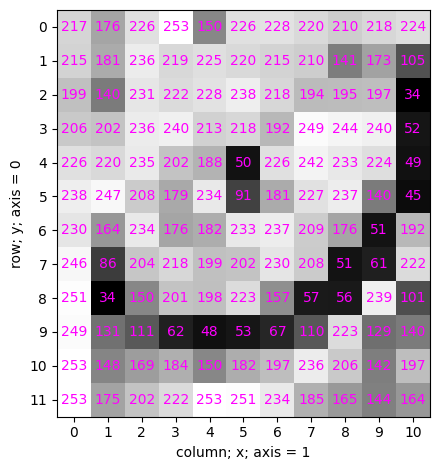

In [585]:
print(cat.ravel())
print(cat.shape)
print(cat.ravel().shape)
valueplot(
    cat, indices="[0:0, 0:0]"
)  # this just plots the entire image with pixelvalues overlaied

#### Now plot the histogram

Text(0, 0.5, 'count')

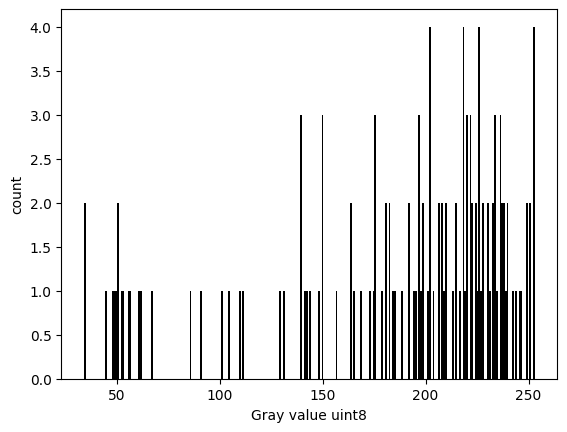

In [586]:
plt.hist(cat.ravel(), bins=256, color="k")
plt.xlabel(f"Gray value {cat.dtype}")  # format string
plt.ylabel("count")

***

### 4.6 Indexing: individual entries

### ✍️ Exercise: Explore indexing of individual entries 

Tip: You can directly index individual entries.  
Or pass variables instead of numbers if the same numbers are to be reused: 

In [587]:
# Pass numbers directly
print(cat[0, 10])

# Define variables
row, col = 0, 10
print(cat[row, col])

224

224

### ✍️ Exercise: Enter different values for ```row``` and ```col```: 
```valueplot``` is a costumn function that visualizes indices provided as strings 

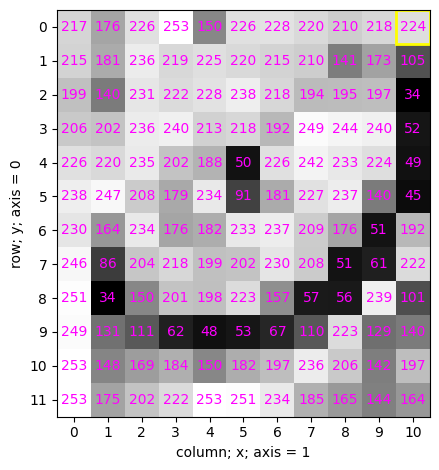

In [588]:
row, col = 0, 10
valueplot(cat, indices=str([row, col]))

### 4.7 Indexing: slicing rows and columns

### Rows

[253 175 202 222 253 251 234 185 165 144 164]

[253 175 202 222 253 251 234 185 165 144 164]

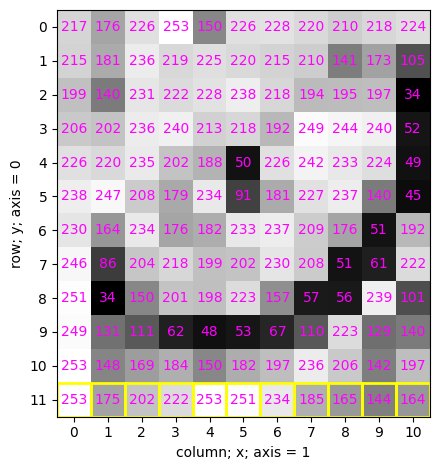

In [589]:
row = -1
print(cat[row])  # If only one number is supplied, it applies to axis 0
print(cat[row, :])  # This is equivalent

valueplot(cat, indices="[-1, :]")  # Show entire row)

### Columns

In [590]:
print(cat[:, 0])

[217 215 199 206 226 238 230 246 251 249 253 253]

### ✍️ Exercise: 
Print these values

<img align="center" src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/python4bia/figures/python4bia_print_values.png" alt="Print these values" width="300px">


In [591]:
print(cat[4:6, 5])

[50 91]

### 4.8 Modifying intensity values using slicing 

### ✍️ Exercise: Make a copy of ```cat```, and name it ```lazercat``` (new variable). Assign a value of 255 to the indicated pixels

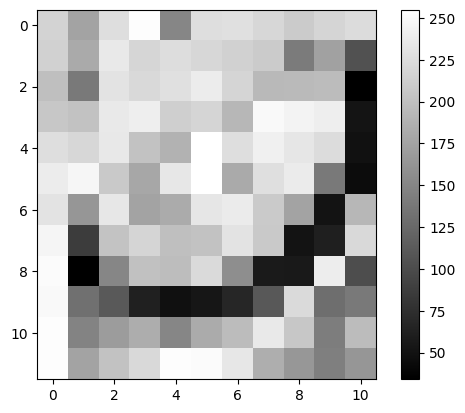

In [592]:
### Pitfall
lazercat = cat
lazercat[4:6, 5] = 255
simpleplot(cat)

### ✍️ Exercise: Inspect the pixelvalues of ```cat``` and ```lazercat``` ```using simpleplot()```

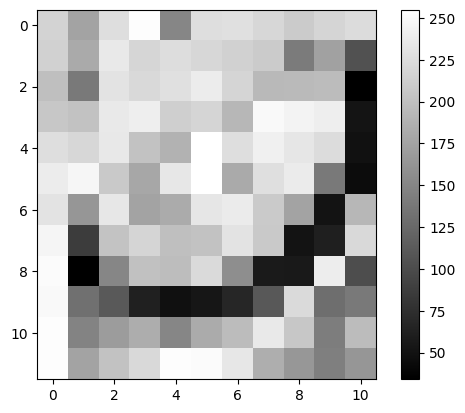

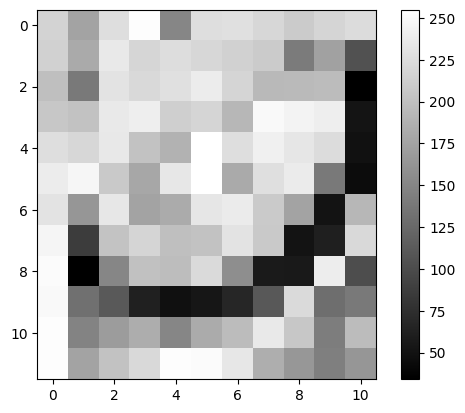

In [593]:
simpleplot(cat)
simpleplot(lazercat)

In [594]:
# reload cat in case it was overwritten
def load_cat(cat_img_path) -> np.ndarray:
    cat = tifffile.imread(cat_img_path)
    return cat


cat = load_cat(cat_img_path)

In [595]:
lazercat = cat.copy()
lazercat[4:6, 5] = 255

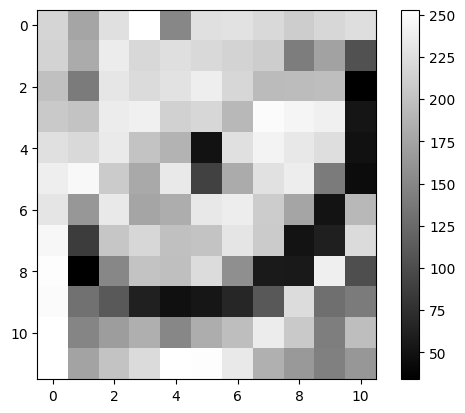

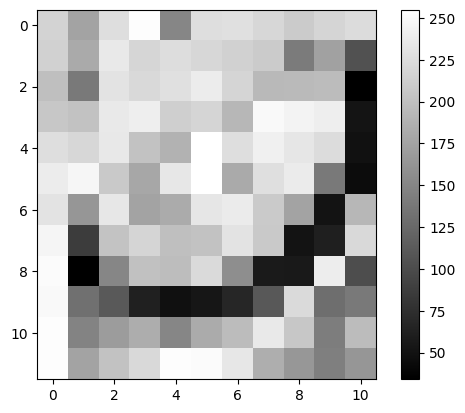

In [596]:
simpleplot(cat)
simpleplot(lazercat)

### ✍️ Exercise: Make a copy of cat and name it "pirate". Assign to all |pixels but the rim-pixels a value of 0. Plot to verify!

In [597]:
# cat = load_cat() # Run if you accidentally overwrote ```cat```

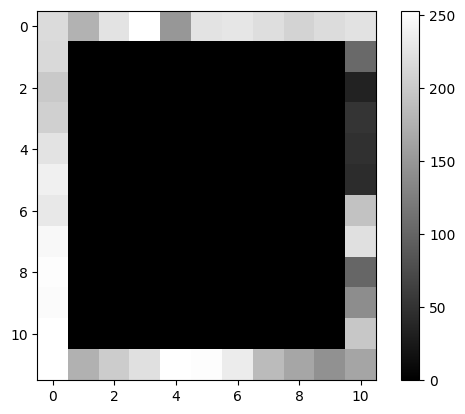

In [598]:
pirate = cat.copy()
pirate[1:-1, 1:-1] = 0
simpleplot(pirate)

### ✍️ Exercise: Make a copy of cat and name it "monocle". Assign a value of 0 to the rim pixels. Plot to verify
Tip: you don't need a for-loop for this 

In [599]:
# cat = load_cat() # Run if you accidentally overwrote ```cat```

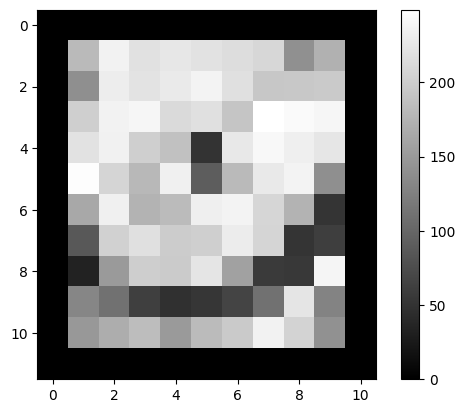

In [600]:
monocle = cat.copy()
pxvalue = 0
monocle[0, :] = pxvalue
monocle[-1, :] = pxvalue
monocle[:, 0] = pxvalue
monocle[:, -1] = pxvalue

simpleplot(monocle)

### ✍️ Exercise: Make a copy of cat and name it "h_tabby". Assign a value of 0 to every other pixel in y to give it a horizontal stripy pattern 

In [601]:
# cat = load_cat() # Run if you accidentally overwrote ```cat```

In [602]:
h_tabby = cat.copy()
ymax = len(cat[0])  # the maximum y value
# for i in range(0, ymax, 2):
#     ...  # fill in the gap

In [603]:
# Solution using a for-loop:
h_tabby = cat.copy()
ymax = cat.shape[0]
for i in range(0, ymax, 2):
    h_tabby[i] = 0

In [604]:
# Here is another solution using slicing:
h_tabby[0:ymax:2] = 0
h_tabby[::2] = 0  # This is equivalent

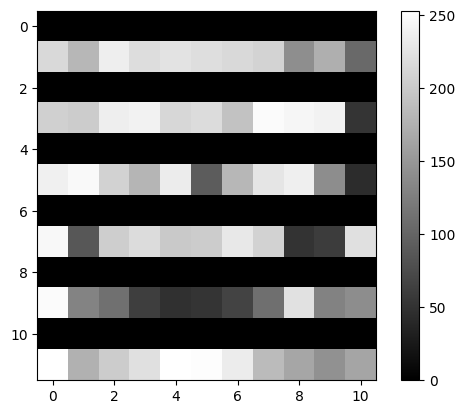

In [605]:
# Test your solution:
simpleplot(h_tabby)

### ✍️ Exercise: Make a copy of cat and name it "v_tabby". Assign a value of 0 to every other pixel in y to give it a vertical stripy pattern 
Do not use a for-loop

In [606]:
# cat = load_cat() # Run if you accidentally overwrote ```cat```

In [607]:
v_tabby = cat.copy()
v_tabby[:, ::2] = 0

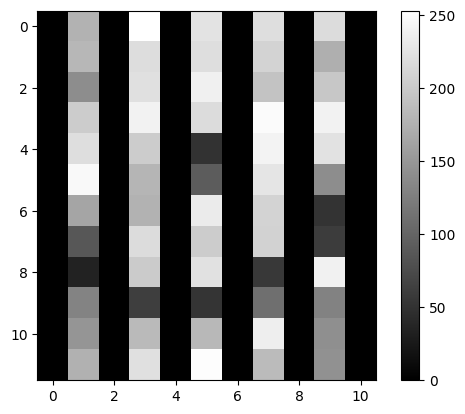

In [608]:
simpleplot(v_tabby)

***

## 5. ```numpy``` and multichannel/z-stacks


#### Reminder: we ran these lines to extract image stack

In [609]:
def read_img(
    path: str = "../../_static/images/python4bia/confocal-series.tif",
) -> np.ndarray:
    img = tifffile.imread(path)
    return img

In [610]:
stack = read_img()

In [611]:
print(stack.dtype)
print(stack.shape)

uint8

(25, 2, 400, 400)

#### Reminder: You can use ndv to inspect the image

In [612]:
ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>

In [613]:
viewer = ndv.imshow(stack)

RFBOutputContext()

<IPython.core.display.Javascript object>


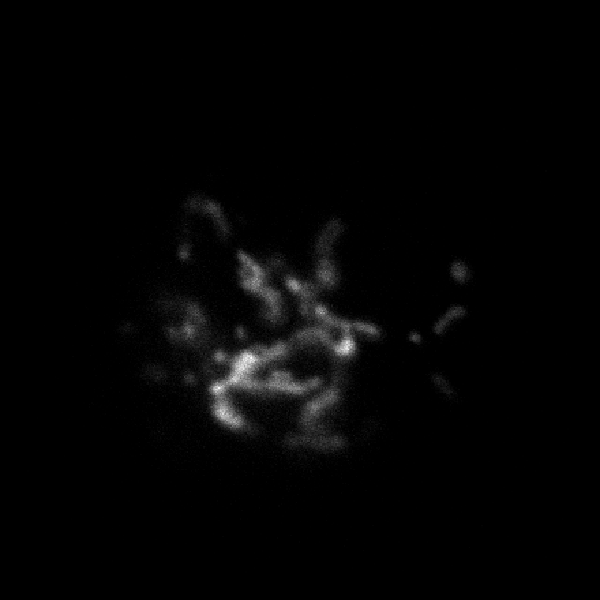

In [614]:
viewer.widget().children[1].snapshot()

### ✍️ Exercise: Create a numpy array ```ch0``` that contains the first channel of ```stack```
**Bonus**: Create a numpy array ```ch1``` that contains the second channel of ```stack```.  
**Note**: This is 0-indexed!

In [615]:
ch0 = stack[:, 0].copy()
ch1 = stack[:, 1].copy()

In [616]:
print(ch0.shape)

(25, 400, 400)

### ✍️ Exercise: plot ```ch0``` using function ```simpleplot()```

In [617]:
## Pitfall:
# simpleplot(ch0)

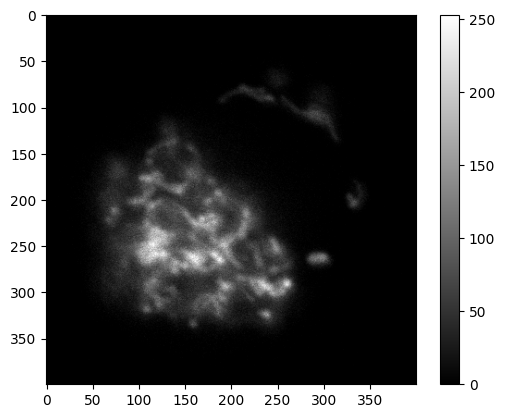

In [618]:
# simpleplot can only plot a 2D array.
# You must index ch0 such that it returns a 2D array. Examples:
z = 17

simpleplot(ch0[z])  # show only one z-plane

### ✍️ Exercise: **Create a mean-projection of channel `ch0`**

**Objective**
Convert the 3-D stack `ch0` (shape `(Z, 400, 400)`) into a 2-D image by averaging over its *z*-planes.



Quick reference [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html): 


```python
numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)

```

**a** (`array_like`) – Array containing numbers whose mean is desired. If a is not an array, a conversion is attempted.  
**axis** (`int`, `tuple[int]`, or `None`) – Axis or axes along which the means are computed. The default is to compute the mean of the flattened array.


In [619]:
# mean_project_ch0 = ...  # fill in the gaps

# # test your result
# assert mean_project_ch0.shape == (400, 400), (
#     f"Your output shape is {mean_project_ch0.shape}, but should be (400, 400)"
# )
# print(mean_project_ch0.shape)
# simpleplot(mean_project_ch0)

(400, 400)

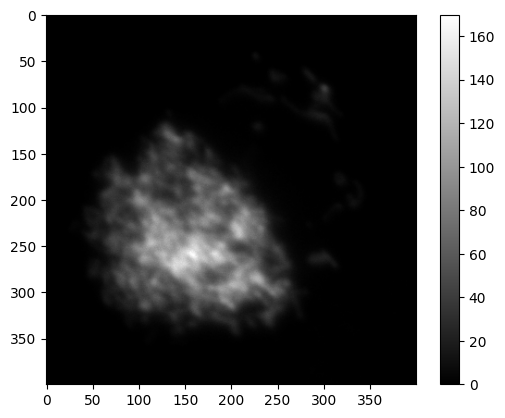

In [620]:
mean_project_ch0 = np.mean(ch0, axis=0)

# test your result
assert mean_project_ch0.shape == (400, 400), (
    f"Your output shape is {mean_project_ch0.shape}, but should be (400, 400)"
)

print(mean_project_ch0.shape)
simpleplot(mean_project_ch0)

### ✍️ Exercise: compute the max projection of ch0
Collapse ```ch0``` into a 2D image by only displaying the maximum value along z. 
The result should be a (400, 400) array where each value represents the maximum of the all z intensity values at that position.  
This is called max projection

https://numpy.org/doc/2.2/reference/generated/numpy.max.html#numpy-max

(400, 400)

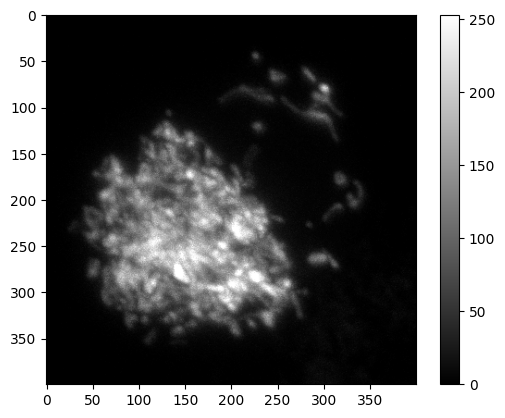

In [621]:
max_project_ch0 = np.max(ch0, axis=0)
print(max_project_ch0.shape)
simpleplot(max_project_ch0)

### ✍️ Exercise (bonus): Try other ```numpy``` projections

Below are a few operations taken from 
https://numpy.org/doc/2.2/reference/routines.statistics.html 


| Category                 | Function        | What it does along an axis         | Example projection (`axis=0`)                                   |
| ------------------------ | --------------- | ---------------------------------- | --------------------------------------------------------------- |
| **Order statistics**     | `np.percentile` | q-th percentile                    | `p50 = np.percentile(stack, 50, axis=0)` ([numpy.org][1])       |
|                          | `np.quantile`   | q-th quantile (fraction 0-1)       | `q25 = np.quantile(stack, 0.25, axis=0)` ([numpy.org][1])       |
| **Averages & variances** | `np.median`     | Median                             | `med = np.median(stack, axis=0)` ([numpy.org][1])               |
|                          | `np.average`    | Weighted average (pass `weights=`) | `w_avg = np.average(stack, axis=0, weights=w)` ([numpy.org][1]) |
|                          | `np.mean`       | Arithmetic mean                    | `mean = np.mean(stack, axis=0)` ([numpy.org][1])                |
|                          | `np.std`        | Standard deviation                 | `sigma = np.std(stack, axis=0)` ([numpy.org][1])                |
|                          | `np.var`        | Variance                           | `var_map = np.var(stack, axis=0)` ([numpy.org][1])              |

[1]: https://numpy.org/doc/stable/reference/routines.statistics.html "Statistics — NumPy v2.3 Manual"


***

## 6. Generating ```numpy``` arrays

There are many reasons to generate```numpy```arrays 
* You may need it as a basis for further computations
* You want to generate dummy data to test something quickly 

### Create an array of filled with 0s with shape [5, 5]

In [622]:
zero_array = np.zeros([5, 5])
print(zero_array)
zero_array.dtype

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

dtype('float64')

### Create an array of filled with 0s with shape [5, 5] and datatype np.uint8

In [623]:
zero_int = np.zeros([5, 5], dtype=np.uint8)
print(zero_int)
zero_int.dtype

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

dtype('uint8')

#### Assign a value of 1 to ```zero_array[0, 0]```. Assign a value of 2.2 to ```zero_array[0,1]```

In [624]:
zero_array[0, 0] = 1
zero_array[0, 1] = 2.2
print(zero_array)

[[1.  2.2 0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]]

### ✍️ Exercise: Assign a value of 1 to ```zero_int[0, 0]```. Assign a value of 2.2 to ```zero_int[0,1]```. Print and explain the results. 

In [625]:
zero_int[0, 0] = 1
zero_int[0, 1] = 2.2
print(zero_int)

[[1 2 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

### Generate an array of zeroes that has the same properties as cat

In [626]:
zeroes_cat = np.zeros_like(cat)

In [627]:
print(zeroes_cat)
print(zeroes_cat.dtype)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]

uint8

## Simulate a multichannel image 
* Call it ```dual_ch_fake```
* Of shape [2,9,10]
* dtype is ```np.uint8```
* Each pixel has a random value between 0 and 256 (exclusive)

In [628]:
?np.random.randint
# dual_ch_fake = np.random.randint(..., dtype=np.uint8))

Signature: np.random.randint(low, high=None, size=None, dtype=<class 'int'>)
Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the `~numpy.random.Generator.integers`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-lik

In [629]:
dual_ch_fake = np.random.randint(0, 256, size=(2, 9, 10), dtype=np.uint8)

Let's plot the two channels:

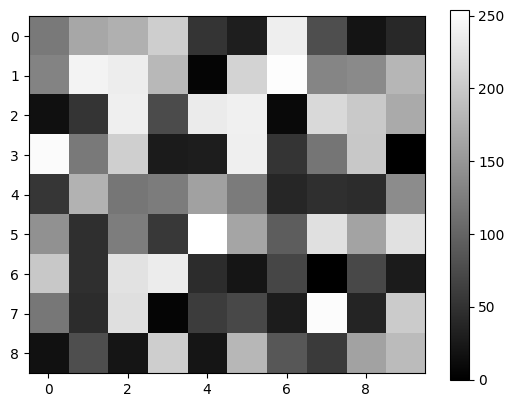

In [630]:
simpleplot(dual_ch_fake[0, :, :])

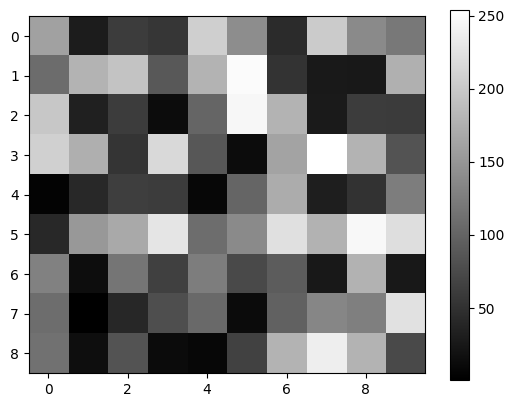

In [631]:
simpleplot(dual_ch_fake[1, :, :])

### ✍️ Exercise (Bonus): sanity-check whether ```np.mean``` does what you expect it to do without using```numpy```

Reminder: You can calculate a mean image of the two channels like this: 

In [632]:
mean_of_channels = np.mean(dual_ch_fake, axis=0)

And generate an array of each channel like this: 

In [633]:
ch_0 = dual_ch_fake[0, :, :].copy()
ch_1 = dual_ch_fake[1, :, :].copy()

And compare two elements like this: 

In [656]:
a = 5
b = 5
a == b

True

In [634]:
### Pitfall
mean_of_channels == (ch_0 + ch_1) / 2  # integer overflow

array([[False,  True,  True, False, False,  True, False, False,  True,
         True],
       [ True, False, False, False,  True, False, False,  True,  True,
        False],
       [ True,  True, False,  True, False, False,  True,  True, False,
         True],
       [False, False, False,  True,  True,  True,  True, False, False,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [ True,  True, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False,  True,  True,  True,  True,  True,
         True],
       [ True,  True, False,  True,  True,  True,  True, False,  True,
        False],
       [ True,  True,  True,  True,  True,  True, False, False, False,
        False]])

In [635]:
### Possible solution:
mean_manual = dual_ch_fake[0, :, :] / 2 + dual_ch_fake[1, :, :] / 2
print(mean_of_channels == mean_manual)
print(np.unique(mean_of_channels == mean_manual))

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]

[ True]

***

## 7. Visualization using ```matplotlib```

In [636]:
def show_2_channels(image: np.ndarray, figsize: tuple = (6, 3)) -> None:
    """
    Show a 2-channel image with each channel in a separate subplot.
    Parameters
    ----------
    image : np.ndarray
        A 3D array of shape (2, height, width) representing a 2-channel image.
    Each channel is expected to be a 2D array of pixel values.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for i in range(2):
        im = axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].imshow(image[i, :, :], cmap="gray", vmin=0, vmax=255)
        axes[i].set_title(f"Channel {i}")
        axes[i].axis("off")
        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

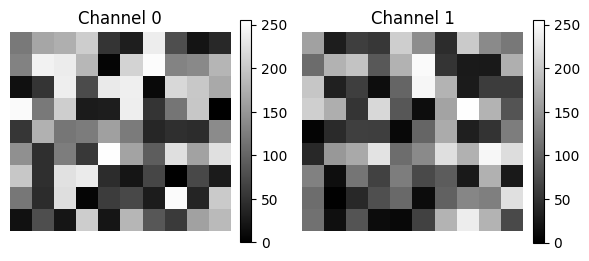

In [637]:
show_2_channels(dual_ch_fake)

### ✍️ Exercise: plot all channels of the following image. Write a function ```show_all_channels()```.

In [638]:
threechannel = np.random.randint(0, 256, size=(3, 5, 5), dtype=np.uint8)

In [639]:
threechannel.shape

(3, 5, 5)

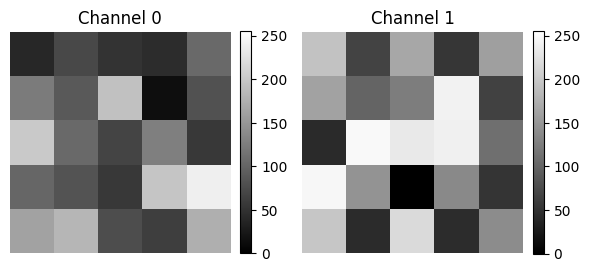

In [640]:
# This works, but it will only show the first two channels.
show_2_channels(threechannel)

In [641]:
def show_all_channels(
    image: np.ndarray, nchannels: int | None = None, figsize: tuple = (6, 3)
) -> None:
    """
    Show all channels of a multi-channel image.
    Parameters
    ----------
    image : np.ndarray
        A 3D array of shape (nchannels, height, width) representing a multi-channel image.
    Each channel is expected to be a 2D array of pixel values.
    nchannels : int, optional
        The number of channels in the image. If None, it will be inferred from the shape
        of the image.
    figsize : tuple, optional
        The size of the figure to display the channels. Default is (6, 3).
    """
    if not nchannels:
        nchannels = image.shape[0]

    fig, axes = plt.subplots(1, nchannels, figsize=figsize)
    for i in range(nchannels):
        vmax = np.max(image[i, :, :])
        vmin = np.min(image[i, :, :])
        im = axes[i].imshow(
            image[i, :, :],
            cmap="gray",
            vmin=vmin,
            vmax=vmax,
        )
        axes[i].imshow(image[i, :, :], cmap="gray", vmin=vmin, vmax=vmax)
        axes[i].set_title(f"Channel {i}")
        axes[i].axis("off")

        # Add colorbar for this subplot
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

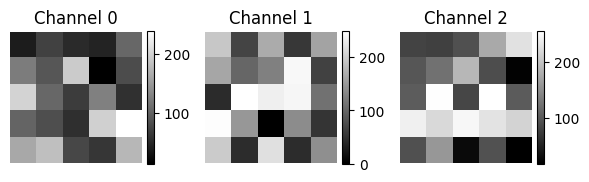

In [642]:
show_all_channels(threechannel)

***

## 8. Bonus: read images using ```bioio```

### ```bioio``` can read various image file formats
There are many ways of reading image files. 
[bioio](https://github.com/bioio-devs/bioio)
can read images of different file-formats.  
Different fileformats require different [plugins](https://github.com/bioio-devs/bioio) 



| Plug-in                | Extension   | Repository          |
|------------------------|-------------|---------------------|
| arraylike              | [ArrayLike](https://github.com/bioio-devs/bioio-base/blob/9ff0a17a20d09b1b11639d149b1e71801c9d68d8/bioio_base/types.py#L15)  | Built-In           |
| bioio-czi              | .czi        | [Repo](https://github.com/bioio-devs/bioio-czi)           |
| bioio-dv               | .dv, .r3d   | [Repo](https://github.com/bioio-devs/bioio-dv)           |
| bioio-imageio          | .jpg, .png, [Full List](https://github.com/bioio-devs/bioio-imageio/blob/6829370644b9780cfde35fa9d2cd5cea9f743681/bioio_imageio/reader_metadata.py#L26)  | [Repo](https://github.com/bioio-devs/bioio-imageio)           |
| bioio-lif              | .lif        | [Repo](https://github.com/bioio-devs/bioio-lif)           |
| bioio-nd2              | .nd2        | [Repo](https://github.com/bioio-devs/bioio-nd2)           |
| bioio-some-tiff         | .some.tiff, .tiff  | [Repo](https://github.com/bioio-devs/bioio-ome-tiff)           |
| bioio-some-tiled-tiff   | .tiles.some.tif   | [Repo](https://github.com/bioio-devs/bioio-ome-tiled-tiff)           |
| bioio-some-zarr         | .zarr       | [Repo](https://github.com/bioio-devs/bioio-ome-zarr)           |
| bioio-sldy             | .sldy, .dir | [Repo](https://github.com/bioio-devs/bioio-sldy)           |
| bioio-tifffile         | .tif , .tiff| [Repo](https://github.com/bioio-devs/bioio-tifffile)           |
| bioio-tiff-glob        | .tiff (glob)| [Repo](https://github.com/bioio-devs/bioio-tiff-glob)           |
| bioio-bioformats       | [Full List](https://github.com/bioio-devs/bioio-bioformats/blob/175399d10d64194adcc7a6048c7b7537591824de/bioio_bioformats/reader_metadata.py#L24) | [Repo](https://github.com/bioio-devs/bioio-bioformats)    



We use [bioio-nd2](https://github.com/bioio-devs/bioio-nd2) to read an nd2 file.  

### Example: Read an nd2 file using ```bioio```
```bioio``` documentation: https://bioio-devs.github.io/bioio/OVERVIEW.html  
Reminder: we imported the relevant packages using 

```python
from bioio import BioImage
import bioio-nd2
```


```bioio``` loads the image and metadata into a container. We name the container ```img```

In [643]:
img_path = "../../_static/images/python4bia/single_pos_002.nd2"
img = BioImage(img_path)

In [644]:
type(img)

bioio.bio_image.BioImage

### ✍️ Exercise: Inspect properties of ```img```
Below are a few examples of how to show properties of ```img``` taken from [here](https://github.com/bioio-devs/bioio).  
Execute a few of them

```python 
# Get a BioImage object
img = BioImage("my_file.tiff")  # selects the first scene found
img.data  # returns 5D TCZYX ```numpy``` array
img.xarray_data  # returns 5D TCZYX xarray data array backed by numpy
img.dims  # returns a Dimensions object
img.dims.order  # returns string "TCZYX"
img.dims.X  # returns size of X dimension
img.shape  # returns tuple of dimension sizes in TCZYX order
img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array

```

In [645]:
print(img.dims.order)
print(
    img.dims
)  # Notice how the order is different than when using tifffile to load the image!
print(img.shape)

TCZYX

<Dimensions [T: 1, C: 3, Z: 1, Y: 2044, X: 2048]>

(1, 3, 1, 2044, 2048)

### Extract a ```numpy``` array from the BioImage object

[numpy documentation](https://numpy.org/doc/stable/)

Reminder: we imported ```numpy``` as follows: 
```python
import numpy as np
```

In [646]:
# the image is contained in img.data
cells = img.data

In [647]:
type(cells)  # verify it's a numpy array

numpy.ndarray

In [648]:
cells.dtype  # check the datatype

dtype('uint16')

### Inspect dimensions of ```stack```

In [649]:
print(img.dims)  # Reminder:
print(cells.shape)  # only one time-point. This is like a movie with only one frame!

<Dimensions [T: 1, C: 3, Z: 1, Y: 2044, X: 2048]>

(1, 3, 1, 2044, 2048)

### Use ```.squeeze()``` to remove axes of length one

To test these concepts, we first generate an array **without** an axis of size one:

In [650]:
simple_list = [1, 2, 3]
simple_array = np.array(simple_list)  # Turn the list into a numpy array

# print a few properties of simple_array
print(type(simple_array))
print(simple_array)
print(simple_array.shape)

<class 'numpy.ndarray'>

[1 2 3]

(3,)

Now, generate an array **with** an axis of length one:

In [651]:
nested_list = [[1, 2, 3]]  # There's extra brackets!
nested_array = np.array(nested_list)

# print a few properties of nested_array
print(type(simple_array))
print(nested_array)
print(nested_array.shape)

<class 'numpy.ndarray'>

[[1 2 3]]

(1, 3)

Next, ```.squeeze()``` removes axes of length one: 

In [652]:
nested_array_squeezed = nested_array.squeeze()

# print a few properties of nested_array_squeezed
print(type(nested_array_squeezed))
print(nested_array_squeezed)
print(nested_array_squeezed.shape)

<class 'numpy.ndarray'>

[1 2 3]

(3,)

### ✍️ Exercise: apply this to image `cells` and print its shape

In [653]:
cells = cells.squeeze()
print(cells.shape)

(3, 2044, 2048)

Congratulations! ```stack``` is now in the correct format to be viewed and modified! 

### ✍️ Exercise: Plot ```cells```
What is the difference? 

In [654]:
# previously, we ran show_all_channels() on threechannel. Compare cells and threechannel:
print(cells.shape)  # This is a 2D array, so we can plot it
print(cells.dtype)
print(threechannel.shape)
print(threechannel.dtype)

(3, 2044, 2048)

uint16

(3, 5, 5)

uint8

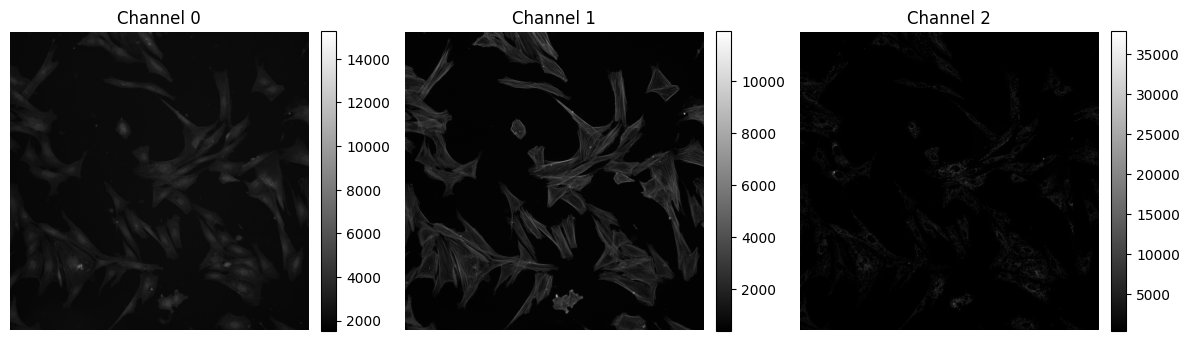

In [655]:
show_all_channels(cells, figsize=(12, 6))